In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import ExtendedBinnedNLL, LeastSquares
from scipy.stats import norm
import matplotlib.ticker as ticker

#curva calibrazione 900mm2
a = 1.10e-3
erra = 0.08e-3


raw_data = np.loadtxt(r"C:\Users\lenovo\Desktop\AlfaRuth24-25_S1\rutherford\rate_senza_oro1.dat")
raw_data2 = np.loadtxt(r"C:\Users\lenovo\Desktop\AlfaRuth24-25_S1\rutherford\rate_senza_oro2.dat")

data=[]

data1 = []
data2=[]

data3=[]
data4=[]

signal=[]
signal1=[]
signal2=[]

for i in range(len(raw_data)):
    for j in range(int(raw_data[i])):
        data1.append(i)
        data.append(i)
        
data2 = np.array(data1)

for i in range(len(data1)):
    if data2[i] > max(0, np.argmax(raw_data))-1000 and data2[i] < np.argmax(raw_data)+1000 : signal1.append(data2[i])


for i in range(len(raw_data2)):
    for j in range(int(raw_data2[i])):
        data3.append(i)
        data.append(i)
        
data4 = np.array(data3)

for i in range(len(data4)):
    if data4[i] > max(0, np.argmax(raw_data))-1000 and data4[i] < np.argmax(raw_data)+1000 : signal2.append(data4[i])



data_ult = np.array(data)

for i in range(len(data_ult)):
    if data_ult[i] > max(0, np.argmax(raw_data))-35 and data_ult[i] < np.argmax(raw_data)+50 : signal.append(data_ult[i])

 
#plt.hist(signal)
#plt.hist(signal1)
#plt.hist(signal2)
#plt.show()
#print(np.argmax(raw_data))

tot = 85
bin_content, bin_edges= np.histogram(signal, bins=10)

N=sum(raw_data)
    
def model(x, N, mu, sigma):
    return N*norm.cdf(x, loc = mu, scale = sigma)
N_ext = 0
for i in range(4750, 4850): #picco1 (più a dx)
    N_ext = N_ext + raw_data[i]
    
    
numbins=[]
chi2=[]

for nbins in range(6, 100):
       
    bin_content, bin_edges = np.histogram(signal, bins = nbins)
    
    costf = ExtendedBinnedNLL(bin_content, bin_edges, model)
    
    my_minuit = Minuit(costf, N = N_ext,  mu = 4800, sigma = 20)
    my_minuit.migrad()
        
    # print(my_minuit.valid)
    if ((my_minuit.valid == True) and (my_minuit.fval/my_minuit.ndof > 0.1 )):
        chi2.append(my_minuit.fval/my_minuit.ndof)
        numbins.append(nbins)
    
    
    #print(numbins[np.array(chi2).argmin()])

index = np.array(chi2).argmin() #dove c'è il fit migliore
nbins = numbins[index]
print(nbins)
bin_content, bin_edges = np.histogram(signal, bins = nbins)
    
N_events = sum(bin_content)
    
costf = ExtendedBinnedNLL(bin_content, bin_edges, model)
    
my_minuit = Minuit(costf, N = N_ext,  mu = 4800, sigma = 20)
    
my_minuit.migrad()
display(my_minuit)


ch_senza=my_minuit.values["mu"]
En_senza = a*ch_senza
err_senza=En_senza* np.sqrt((erra/a)**2+(tot/nbins/ch_senza)**2)

print(f"${my_minuit.values["mu"]} \\pm {tot/nbins}$")
print(f"${En_senza} \\pm {err_senza}$")
print(N_events)
#t_rate_senza =  
#print(f"$Rate_{0}= {N_events/t_rate_senza}$")


E VariableMetricBuilder Initial matrix not pos.def.
E VariableMetricBuilder Initial matrix not pos.def.
27


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 25.1 (χ²/ndof = 1.0)       │              Nfcn = 586              │
│ EDM = 5.15e-07 (Goal: 0.0002)    │            time = 0.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N     │    868    │    30     │            │            │         │         │       │
│ 1 │ mu    │ 4.9574e3  │ 0.0005e3  │            │            │         │         │       │
│ 2 │ sigma │   15.0    │    0.4    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │     N    mu sigma │
├───────┼───────────────────┤
│     N │   890 -0.87  1.10 │
│    mu │ -0.87   0.3 -0.04 │
│ sigma │  1.10 -0.04 0.191 │
└───────┴───────────────────┘

$4957.371861097097 \pm 3.1481481481481484$
$5.453109047206808 \pm 0.39660486763950037$
854


In [2]:
raw_data3 = np.loadtxt(r"C:\Users\lenovo\Desktop\AlfaRuth24-25_S1\rutherford\spessore_oro.dat")

data_con=[]
data_def=[]

signal_con=[]


for i in range(len(raw_data3)):
    for j in range(int(raw_data3[i])):
        data_con.append(i)
        
data_def = np.array(data_con)

for i in range(len(data_con)):
    if data_def[i] > 4805-60 and data_def[i] < 4805+80 : signal_con.append(data_def[i])

tot2=140

"""plt.hist(signal_con)
plt.show()"""
#print(np.argmax(raw_data))
    
bin_content, bin_edges= np.histogram(signal_con, bins=10)

N=sum(raw_data3)
    
def model(x, N, mu, sigma):
    return N*norm.cdf(x, loc = mu, scale = sigma)
N_ext = 0
for i in range(3000, 5550): #picco1 (più a dx)
    N_ext = N_ext + raw_data[i]
    
    
numbins=[]
chi2=[]

for nbins in range(6, 50):
       
    bin_content, bin_edges = np.histogram(signal_con, bins = nbins)
    
    costf = ExtendedBinnedNLL(bin_content, bin_edges, model)
    
    my_minuit2 = Minuit(costf, N = N_ext,  mu = 4800, sigma = 20)
    my_minuit2.migrad()
        
    # print(my_minuit.valid)
    if ((my_minuit2.valid == True) and (my_minuit2.fval/my_minuit2.ndof > .9 )):
        chi2.append(my_minuit2.fval/my_minuit2.ndof)
        numbins.append(nbins)
    
    
    #print(numbins[np.array(chi2).argmin()])

index = np.array(chi2).argmin() #dove c'è il fit migliore
nbins = numbins[index]
print(nbins)
bin_content, bin_edges = np.histogram(signal_con, bins = nbins)
    
N_events = sum(bin_content)
    
costf = ExtendedBinnedNLL(bin_content, bin_edges, model)
    
my_minuit2 = Minuit(costf, N = N_ext,  mu = 4800, sigma = 20)
    
my_minuit2.migrad()
display(my_minuit2)


ch_con=my_minuit2.values["mu"]
En_con = a*ch_con
err_con=En_con* np.sqrt((erra/a)**2+(tot/nbins/ch_con)**2)


print(f"${my_minuit2.values["mu"]} \\pm {tot/nbins}$")
print(f"${En_con} \\pm {err_con}$")

27


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 23.84 (χ²/ndof = 1.0)      │              Nfcn = 94               │
│ EDM = 1.5e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N     │    226    │    16     │            │            │         │         │       │
│ 1 │ mu    │ 4.8061e3  │ 0.0024e3  │            │            │         │         │       │
│ 2 │ sigma │   30.6    │    2.1    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │     N    mu sigma │
├───────┼───────────────────┤
│     N │   245    -4     7 │
│    mu │    -4  5.65    -1 │
│ sigma │     7    -1  4.44 │
└───────┴───────────────────┘

$4806.127696041411 \pm 3.1481481481481484$
$5.286740465645552 \pm 0.3845058101884591$


In [3]:
dE = abs(En_con-En_senza)
dE_err = np.sqrt(err_con**2+err_senza**2)

pf_Au = 2.227e2 #Mev/g/cm2
dens_Au = 19320e-3  #g/cm3 
d = dE/dens_Au/pf_Au*10**4 #um
err_d = dE_err/dens_Au/pf_Au*10**4

print(f"spessore strato oro: ({d} +- {err_d}) um")
print(f"Differenza energia = {dE} +- {dE_err}")

spessore strato oro: (0.3866731129653283 +- 1.283873783799694) um
Differenza energia = 0.16636858156125545 +- 0.5523949122720347


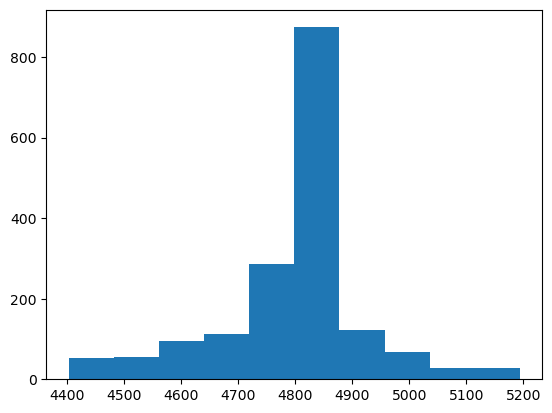

1725 170.1716763888889


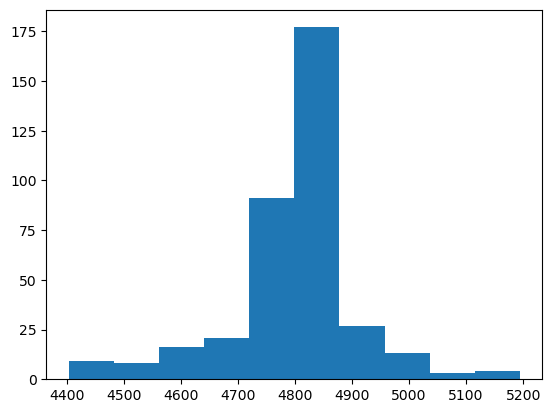

369 30.140930277777777


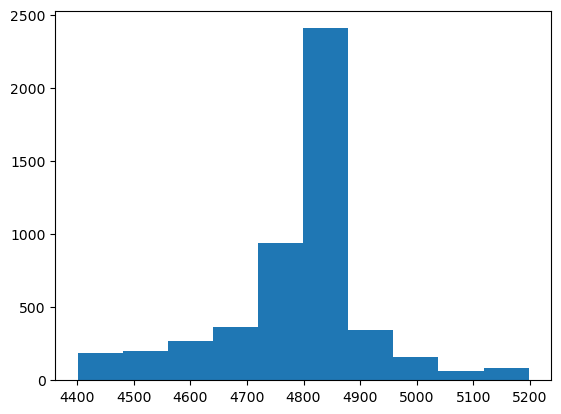

5006 473.59946472222225


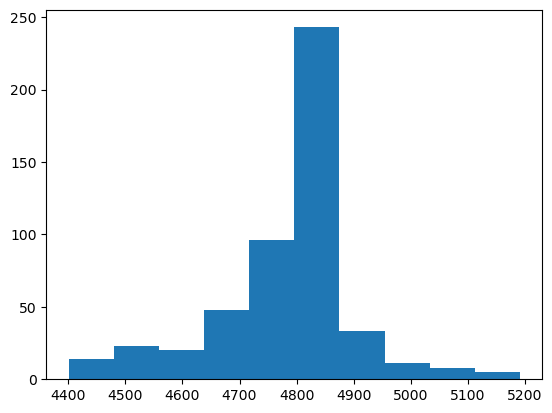

501 50.94260861111111
[10.136822041159789, 12.242488755300805, 10.57011329802947, 9.83459649317461] [0.2440659938007299, 0.6373185079314283, 0.1493943660741537, 0.43937736790175724]


In [4]:
t = [612618.035, 108507.349, 1704958.073, 183393.391] #secondi
h = [39.4, 41.6, 43.8, 48] #mm

Rate = []
err_Rate=[]

for l in range(len(h)):
    dat1 = []
    total=[]

    raw = np.loadtxt(r"C:\Users\lenovo\Desktop\AlfaRuth24-25_S1\rutherford\rutherford_" + str(h[l]) + ".dat")


    for i in range(len(raw)):
        for j in range(int(raw[i])):
            dat1.append(i)
        
    dat = np.array(dat1)

    for i in range(len(dat)):
        if dat[i] > 4400 and dat[i] < 5200 : total.append(dat[i])

    
    plt.hist(total)
    plt.show()
    bin_content, bin_edges = np.histogram(total, bins = 10)
    Cont = sum(bin_content)
    print(Cont, t[l]/3600)
    Rate.append(Cont/t[l]*60*60) #N/h
    err_Rate.append(np.sqrt(Cont)/t[l]*3600)

print(Rate, err_Rate)
#print(list(map(lambda x: x/3600, t)))
#print(Rate)

[0.17583027608172255, 0.1667075226055862, 0.15847716779825763, 0.14481249823893905]


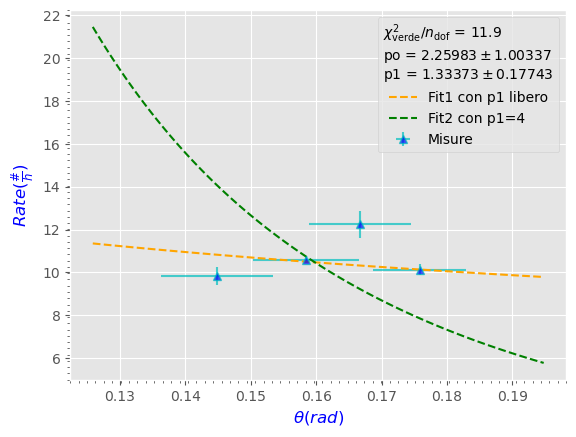

10.074332730102768
0.4063130204170233
9.551637458381855
0.44373805063717353
9.08007286402672
0.4661584621184377
8.297144969836875
0.4909003095094997


In [14]:
d = 7

angolo = list(map(lambda x: np.arctan(d/x), h))
print(angolo)

#errangolo = list(map(lambda x: x/100, angolo))
errangolo = [0.0070915, 0.00774469, 0.00813600, 0.0085678267]


err=[]

for i in range(len(h)):
    err.append(err_Rate[i] +  Rate[i]*errangolo[i]/angolo[i])

    
f = lambda x, po: po*np.sin(x)/(np.sin(x/2))**4
f2 = lambda x, po, p1: po*np.sin(x)/(np.sin(x/2))**p1

#po_ext = Ro * () * 900 *  


least_squares = LeastSquares (angolo, Rate, err, f)
least_squares2 = LeastSquares (angolo, Rate, err, f2)

m = Minuit (least_squares, po=0) 
m.migrad ()  
m.hesse ()

m2 = Minuit (least_squares2, po=0, p1=4) 
m2.migrad ()  
m2.hesse ()


x2 = np.linspace(angolo[0]-.05, angolo[-1]+.05, 100)

fig, ax = plt.subplots()

plt.errorbar(angolo, Rate, xerr= list(map(lambda x: x, errangolo)), yerr= list(map(lambda x: x, err_Rate)), linestyle="None", marker="^", color="k", mec="c", mfc="b", ecolor="c", label="Misure", alpha=.7)

plt.plot(x2, f2(x2, m2.values[0], m2.values[1]), linestyle="--", color="orange", label="Fit1 con p1 libero")
plt.plot(x2, f(x2, m.values[0]), linestyle="--", color="green", label="Fit2 con p1=4")

plt.grid("on")
plt.xlabel(r"$\theta (rad) $", color="b")
plt.ylabel(r"$ Rate (\frac{\#}{h}) $", color="b", rotation=90)

fit_info = [
    f"$\\chi^2_\\mathrm{{verde}}$/$n_\\mathrm{{dof}}$ = {m.fmin.reduced_chi2:.1f}",
]
for p, v, e in zip(m2.parameters, m2.values, m2.errors):
    fit_info.append(f"{p} = ${v:.5f} \\pm {e:.5f}$")

plt.legend(title="\n".join(fit_info), frameon=True, loc = "upper right")

plt.style.use("ggplot")

#plt.xlim(10, 80)
# For the x-axis
ax.xaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.xaxis.set_major_locator(ticker.LinearLocator(8))
# For the y-axis
ax.yaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.yaxis.set_major_locator(ticker.LinearLocator(8))

plt.show()

for i in range(len(angolo)):
    print(angolo[i]*360/2/np.pi)
    print(errangolo[i]*360/2/np.pi)
